In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [395]:
df_train= pd.read_csv('Titanic_train.csv')
df_test= pd.read_csv('Titanic_test.csv')

In [397]:
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [399]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Data Preprocessing

In [402]:
def data_preprocess(df):
    df= df.drop(columns=['Name','Ticket','Cabin'],errors='ignore')  # dropping irrelevant columsns
    imputer= SimpleImputer(strategy='most_frequent')
    df[:] = imputer.fit_transform(df)   # replacing missing values
    df= pd.get_dummies(df,drop_first=True) # converting categorical columns
    return df   

In [404]:
df_train= data_preprocess(df_train)
df_test= data_preprocess(df_test)

In [406]:
df_train.isnull().sum()  # no missing values

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [408]:
df_train.duplicated().sum()   # no duplicates

0

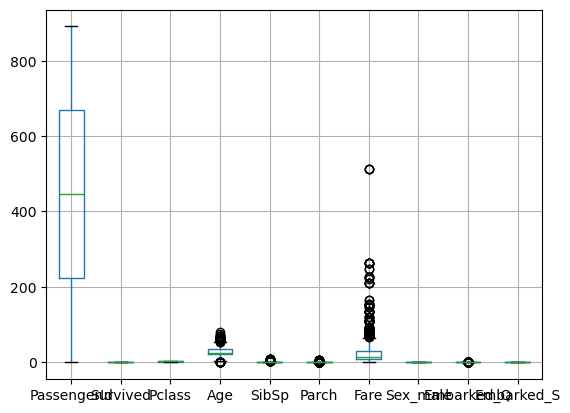

In [410]:
df_train.boxplot()
plt.show()

In [412]:
def outliers_capping(df,column):    # outliers capping using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-(1.5*IQR)
    upper_bound= Q3+(1.5*IQR)
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for i in df_train.select_dtypes(include=['float','int']).columns:
    outliers_capping(df_train,i)

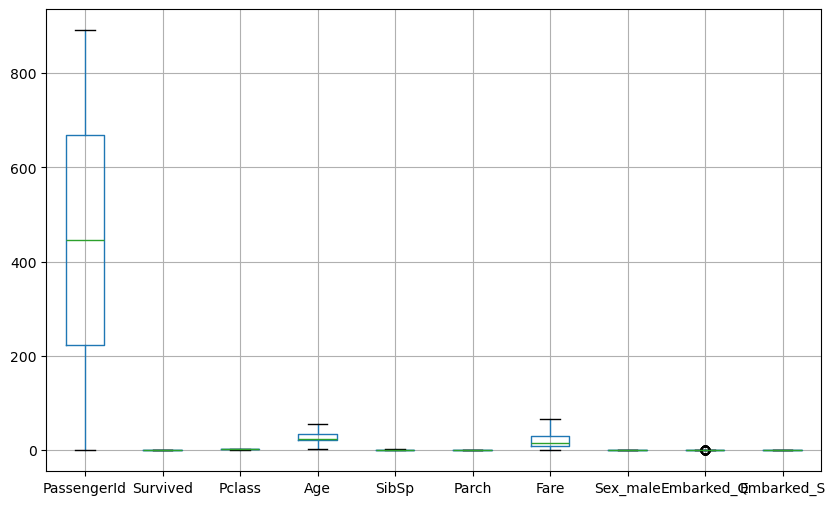

In [414]:
df_train.boxplot(figsize=(10,6))   # no outliers
plt.show()

## Visualizations

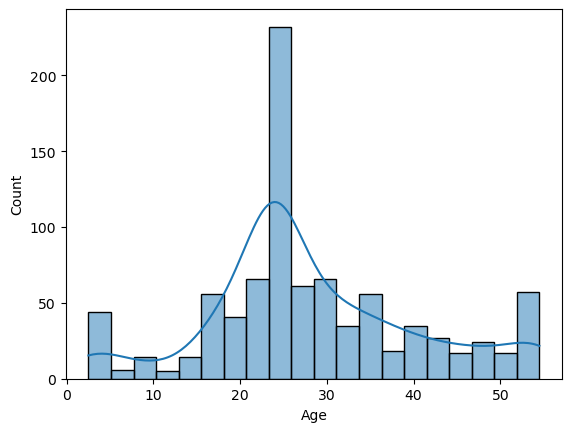

In [417]:
sns.histplot(df_train['Age'],bins=20,kde=True)  # Histogram
plt.show()

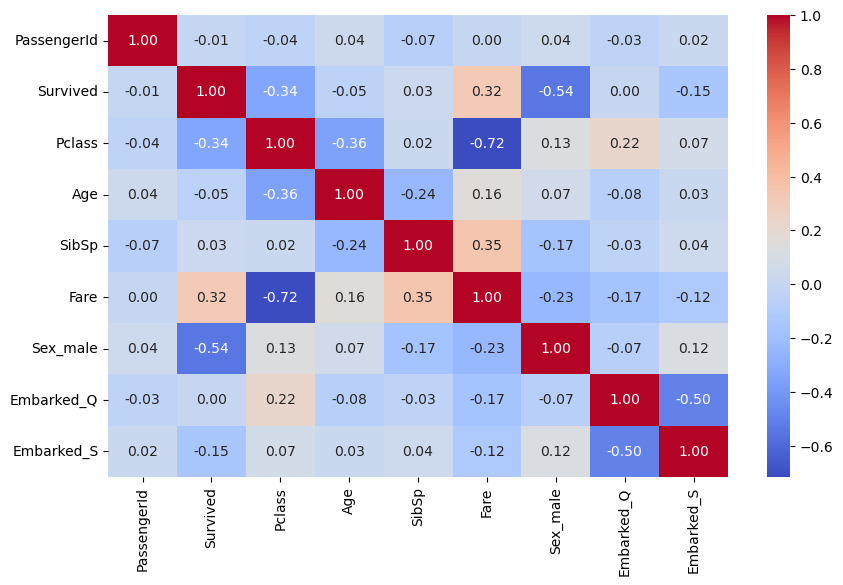

In [419]:
df_filter= df_train.loc[:,(df_train !=0).any(axis=0)]    # correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_filter.corr(numeric_only= True),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()


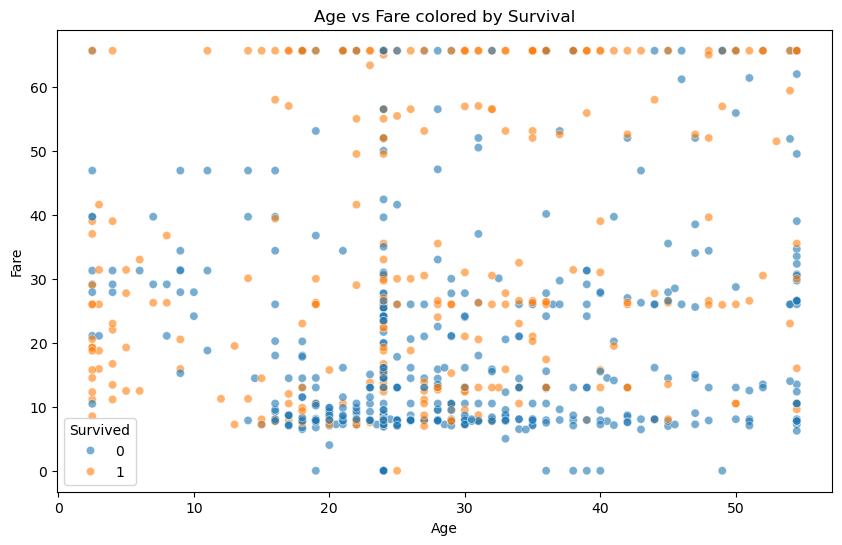

In [421]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Age',y= 'Fare',hue='Survived',data= df_train, alpha=0.6)
plt.title('Age vs Fare colored by Survival')
plt.show()

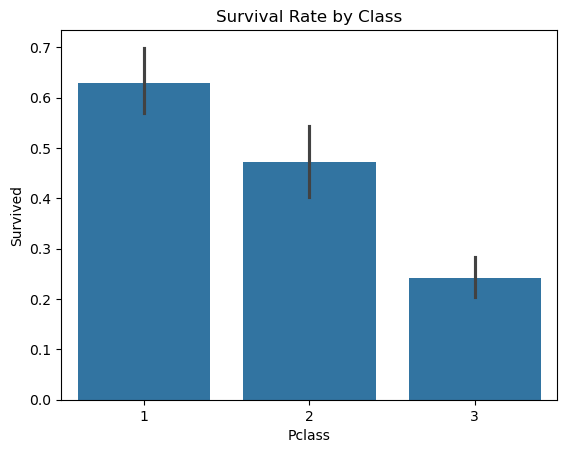

In [423]:
sns.barplot(x='Pclass',y='Survived',data= df_train)
plt.title('Survival Rate by Class')
plt.show()   # barplot

In [425]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 51.5 KB


## Building predictive models

In [428]:
target= df_train['Survived']   # target
features= df_train.drop(columns=['Survived'])  # features

In [430]:
x_train,x_test,y_train,y_test= train_test_split(features,target, test_size=0.2, random_state=42)

In [432]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [434]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [435]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [437]:
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [438]:
lgb_model= lgb.LGBMClassifier()

In [442]:
lgb_model.fit(x_train,y_train)   # training LightGBM model

LGBMClassifier()

In [444]:
y_pred_lgb= lgb_model.predict(x_test)    # making predictions
y_pred_lgb

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [446]:
xgb_model= xgb.XGBClassifier(use_label_encoder= False,eval_metrics= 'logloss')
xgb_model.fit(x_train,y_train)   # Training XGBoost Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [448]:
y_pred_xgb= xgb_model.predict(x_test)  # making predictions
y_pred_xgb

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [450]:
# Hyperparameter tuning
lgb_param_grid = {'num_leaves': [31, 50],
                  'learning_rate': [0.01, 0.05, 0.1],
                  'n_estimators': [100, 200, 500]}    # parameters grid for LightGBM

In [452]:
lgb_grid= GridSearchCV(lgb.LGBMClassifier(),lgb_param_grid,cv=5,scoring='accuracy')
lgb_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 50]},
             scoring='accuracy')

In [453]:
print('Best LightGBM Params:', lgb_grid.best_params_)
print('Best LightGBM Score:', lgb_grid.best_score_)

Best LightGBM Params: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}
Best LightGBM Score: 0.8230079779375554


In [454]:
# Hyperparameter tuning for XGBoosting
xgb_param_grid = {'num_leaves': [31, 50],   
                  'learning_rate': [0.01, 0.05, 0.1],
                  'n_estimators': [100, 200, 500]} 

In [455]:
xgb_grid= GridSearchCV(xgb.XGBClassifier(),xgb_param_grid,cv=5,scoring='accuracy')
xgb_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 50]},
             scoring='accuracy')

In [456]:
print('Best XGBoost Params:', xgb_grid.best_params_)
print('Best XGBoost Score:', xgb_grid.best_score_)

Best XGBoost Params: {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}
Best XGBoost Score: 0.821609376538954


### Accuracy Scores

In [353]:
print(classification_report(y_test,y_pred_lgb))
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Algorithm 1 is Superior: It excels in accuracy, class-wise metrics, and balance. Use this if prioritizing overall performance and minority class recall.

Algorithm 2 Struggles with Class 1: Its lower recall for Class 1 suggests it may not be suitable for applications where missing positive cases (e.g., medical diagnoses) is critical
